# Monte Carlo Methods

### Last Class
- Monte Carlo Introduction

### Goals for Today
- Define kernel density
- Implement a kernel density function to appoximate a probability distribution
- Discuss the advantages and disadvantages of various kernels
- Apply a kernel density function to a mathematical model

### Pre-Lecture Activities
- [MATH 360 > Kernel Density](https://ubcmath.github.io/MATH360/stochastic/kernel.html)

Comment about syntax: When we write $X \sim N(\mu,\sigma^2)$ it means that the random variable $X$ is normally distributed with mean $\mu$ and variance $\sigma^2$.

## Clicker Questions

1. What is the goal of Kernel Density Estimation?

   a. Predict the outcome of a random variable $X$.

   b. Calculate the conditional probability of an event.

   c. Approximating the probability density function.

   d. Approximating the normal distribution.

2. A kernel function needs to satisfy certain criteria. In particular, it is a symmetric porbabiity density function.

   a. True.

   b. False.

   c. Not sure.

3. To generate a kernel density function, we need to specify the kernel and bandwith.

   a. True.

   b. False.

   c. Not sure.

4. The bandwith parameter acts like a smoother, where higher values of $h$ result in a smoother distribution.

   a. True.

   b. False.

   C. Not Sure. 

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
from scipy import stats
import scipy.integrate as integrate
%matplotlib inline


print("packages imported")

packages imported


### Relation to Histograms

Let's first look at how Kernel density and histograms are related.  
1. Plot a histogram for the data: $[-1.5, -1.2, -0.8, -0.3, 0.4, 0.9].$
2. Use a Gaussian Kernel to form a kernel density for the data points.  Plot the function on the same plot as the data. How does the function "change" when it is near each data point?

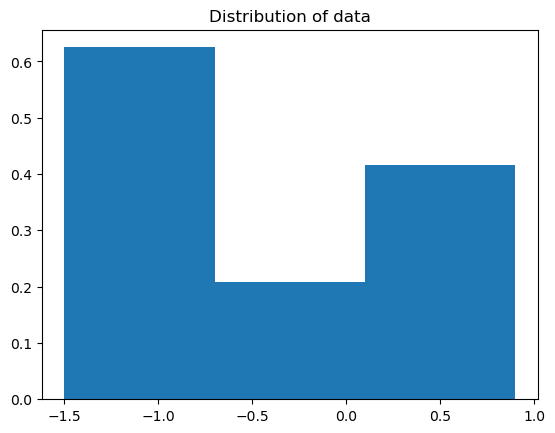

In [2]:
#Let's first look at how Kernel density and histograms are related

#create some data
X = np.array([-1.5, -1.2, -0.8, -0.3, 0.4, 0.9])

#plot the histogram
plt.hist(X, bins = 3,density = True) ## try playing with different bin numbers to see how the distribution changes
plt.title('Distribution of data')
plt.show()

In [3]:
# create a kernel density for each data point x_i

x = np.linspace(-3,2,100)

#choose gaussian kernel - from course notes
K = lambda x: 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
fh = lambda x,h: 1/(len(X)*h)*sum([K((x - X[i])/h) for i in range(len(X))])

h = 0.3


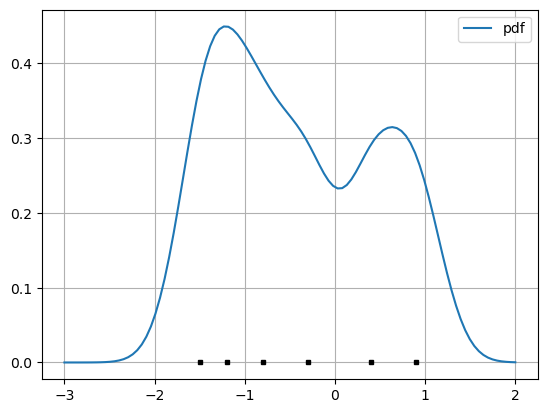

In [4]:
plt.plot(X, np.zeros_like(X), 's', markersize=3, color='black')
plt.plot(x, fh(x,h),label = 'pdf')
plt.legend()
plt.grid()
plt.show()

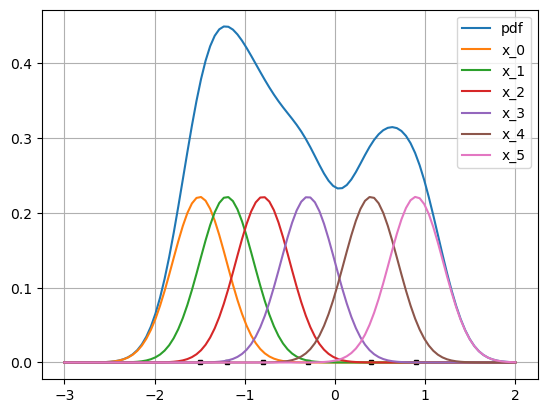

In [5]:
plt.plot(X, np.zeros_like(X), 's', markersize=3, color='black')
plt.plot(x, fh(x,h),label = 'pdf')
plt.plot(x, 1/(len(X)*h)*(K((x - X[0])/h)),label = 'x_0') # kernel density function for x_0
plt.plot(x, 1/(len(X)*h)*(K((x - X[1])/h)),label = 'x_1') # kernel density function for x_1
plt.plot(x, 1/(len(X)*h)*(K((x - X[2])/h)),label = 'x_2') # kernel density function for x_2
plt.plot(x, 1/(len(X)*h)*(K((x - X[3])/h)),label = 'x_3') # kernel density function for x_3
plt.plot(x, 1/(len(X)*h)*(K((x - X[4])/h)),label = 'x_4') # kernel density function for x_4
plt.plot(x, 1/(len(X)*h)*(K((x - X[5])/h)),label = 'x_5') # kernel density function for x_5
plt.legend()
plt.grid()
plt.show()

### Transit Travel Time 3

Let's suppose we have to take two buses to reach UBC campus from where we live.  The first bus ride is an average of 11 minutes, with a variance of 2 minutes, and the second bus ride is an average of 20 minutes, with a variance of 4 minutes.  Let's further assume that each bus trip is normally distributed.

Find the kernel density function using a Gaussian kernel, and then use the function to determine the probability that the time to reach campus is less than 30 minutes.

**Problem Statement** 

Determine the proability that the transit time to campus is less than 30 minutes.

Simulate the transit time to campus.

How early should we get up to get to campus?

Determine the probability distribution of the transit time to UBC campus and determine the probability that the time to reach campus is less than 30 minutes.

**Variables and Parameters**

Random variables
- $X1$: Time for first bus trip
- $X2$: Time for second bus trip
- $Y$: Total travel time

Parameters:
- $\mu_1$: Average time for first bus trip
- $\sigma_1^2$: Variance for first bus trip
- $\mu_2$: Average time for second bus trip
- $\sigma_2^2$: Variance for second bus trip
- $\mu_Y$: Average time for total bus trip
- $\sigma_Y^2$: Variance for total bus trip

**Assumptions and Variables**
- Random variables $X1$ and $X2$ are normallly distributed.
- Events are independent.
- There is no wait time between the first and second busses.

**Build Solutions**

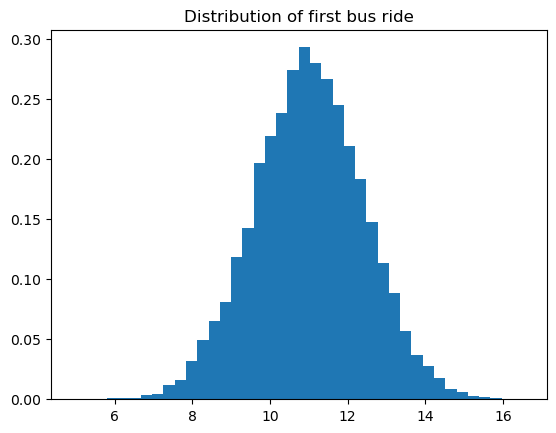

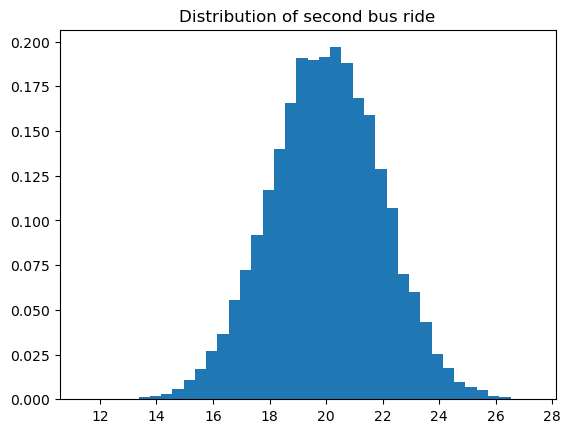

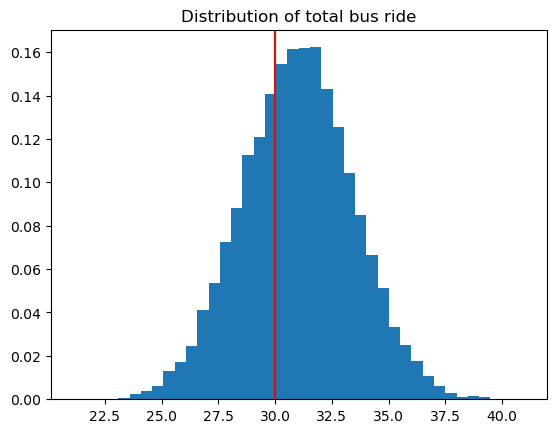

In [6]:
#number of Monte Carlo simulations
N = 20000 

#bus distributions
X1 = np.random.normal(loc=11, scale=np.sqrt(2), size=N)
X2 = np.random.normal(loc=20, scale=np.sqrt(4), size=N)

# total bus time
Y = X1 + X2

plt.hist(X1, bins = 40,density = True)
plt.title('Distribution of first bus ride')
plt.show()

plt.hist(X2, bins = 40,density=True)
plt.title('Distribution of second bus ride')
plt.show()

plt.hist(Y,bins = 40, density = True) 
plt.axvline(x = 30, color = 'r') #cut off for question
plt.title('Distribution of total bus ride')
plt.show()

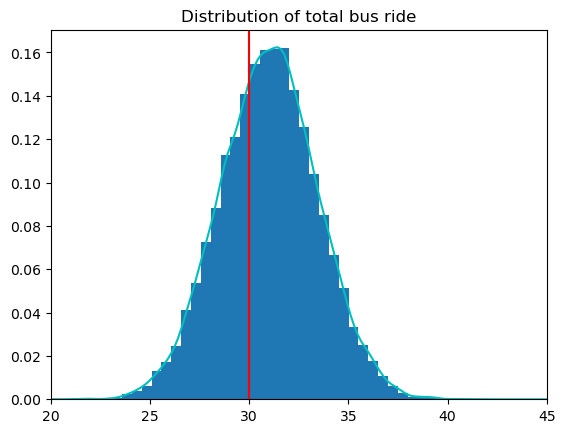

In [7]:
# Create a kernel density for each x_i
# from the histogram, the spread of x appears to be [20,40]
# to ensure that we have all the x values, we will pick our x
# to be spaced over the larger interval [0,50]
x = np.linspace(0,50,300) 

K = lambda x: 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
fh = lambda x,h: 1/(len(Y)*h)*sum([K((x - Y[i])/h) for i in range(len(Y))])


plt.hist(Y,bins = 40, density = True) 
plt.plot(x,fh(x,0.3),color = 'c')
plt.axvline(x = 30, color = 'r') #cut off for question
plt.title('Distribution of total bus ride')
plt.xlim([20,45])
plt.show()

In [8]:
#calculate cumulative probability
prob = integrate.cumulative_trapezoid(fh(x,0.3), x, initial=0) ## this creates the cumulative density function

index =  np.array(np.where(x < 30)) #find the index where x<30

print((prob[index.max()])*100,"%") #print the value

33.13949384758834 %


Note: scipy.quad requires $f$ to be a *function*, however, the way the kernel is defined here is as a numerical function (i.e., we do not have an algebraic form). Hence why you will see errors from python when trying to integrate with quad.  We do have the numerical function though (i.e., we have a set of points that define the function line), so we can use any of the numerical integration techniques (e.g., trapezoid rule, Simpson's rule) to integrate these using either a built in function or our own Riemann Sum loop.

### Transit Travel Time 4

Let's again suppose we have to take two buses to reach UBC campus from where we live.  The first bus ride is an average of 11 minutes, with a variance of 2 minutes, and the second bus ride is an average of 20 minutes, with a variance of 4 minutes.  Let's further assume that each bus trip is normally distributed.

Between getting off of the first bus and getting on the second bus, we have to wait an average of 5 minutes.  Assume that the wait time is exponentially distributed.  

Find the kernel density function using a Gaussian kernel, a Triangular kernel, and a Rectangular kernel, and then use the functions to determine the probability that the time to reach campus is less than 30 minutes.  What differences do you observe when a different kernel function is chosen? Use $h=0.3$ as the bandwidth for both kernels.

Discuss the advantages and disadvantages to each of the kernel functions.

**Problem Statement** 

Determine the probability distribution of the transit time to UBC campus and determine the probability that the time to reach campus is less than 30 minutes.

**Variables and Parameters**

Random variables
- $X1$: Time for first bus trip
- $X2$: Time for second bus trip
- $X3$: Time to wait between first bus and second bus
- $Y$: Total time for trip

Parameters:
- $\mu_1$: Average time for first bus trip
- $\sigma_1^2$: Variance for first bus trip
- $\mu_2$: Average time for second bus trip
- $\sigma_2^2$: Variance for second bus trip
- $\mu_3$: Average wait time between bus one and bus two
- $\mu_Y$: Average time for total bus trip
- $\sigma_Y^2$: Variance for total bus trip

**Assumptions and Variables**
- Random variable $X1$ is normally distributed.
- Random variable $X2$ is normally distributed.
- Random variable $X3$ is exponentially distributed.
- Events are independent.
- There are no additional wait times except the wait time between the first and second busses.

**Build Solutions**

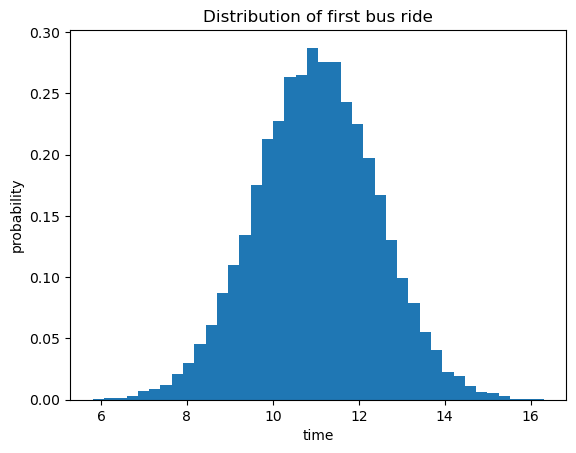

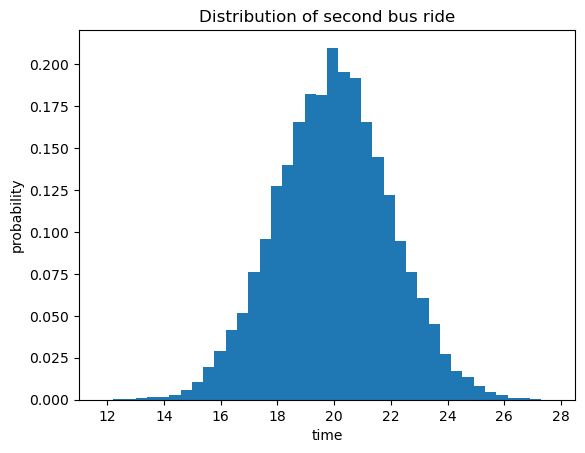

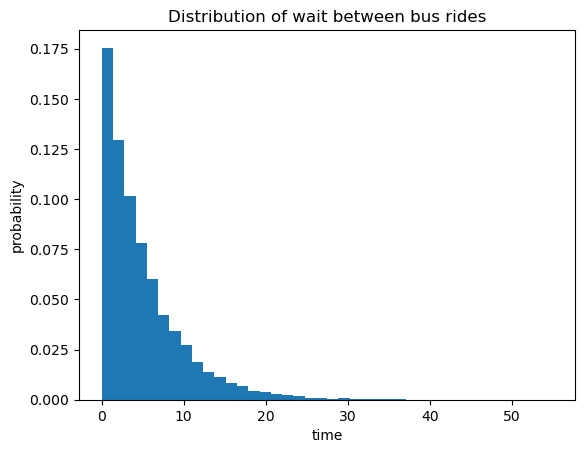

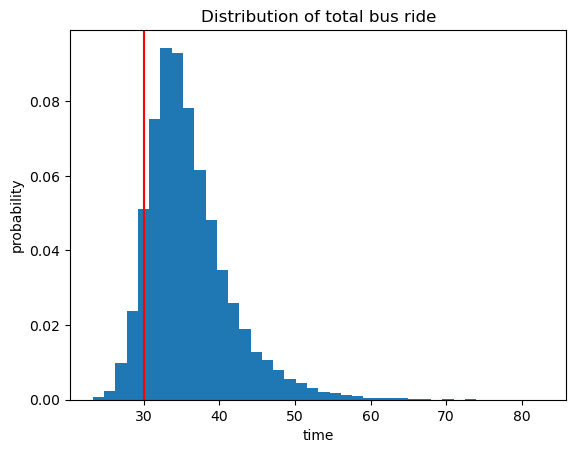

8.875 %


In [9]:
#number of Monte Carlo simulations
N = 20000 

#bus distributions
X1 = np.random.normal(loc=11, scale=np.sqrt(2), size=N)
X2 = np.random.normal(loc=20, scale=np.sqrt(4), size=N)
X3 = np.random.exponential(scale=5 ,size=N)

# total bus time
Y1 = X1 + X2 + X3

plt.hist(X1, bins = 40,density = True)
plt.title('Distribution of first bus ride')
plt.xlabel('time')
plt.ylabel('probability')
plt.show()

plt.hist(X2, bins = 40,density=True)
plt.title('Distribution of second bus ride')
plt.xlabel('time')
plt.ylabel('probability')
plt.show()

plt.hist(X3, bins = 40,density=True)
plt.title('Distribution of wait between bus rides')
plt.xlabel('time')
plt.ylabel('probability')
plt.show()

plt.hist(Y1,bins = 40, density = True) 
plt.axvline(x = 30, color = 'r') #cut off for question
plt.title('Distribution of total bus ride')
plt.xlabel('time')
plt.ylabel('probability')
plt.show()

# calculation of probability that bus trip is less than 30 minutes

prob = np.sum(Y1 < 30)/len(Y1)*100
print(prob, "%")

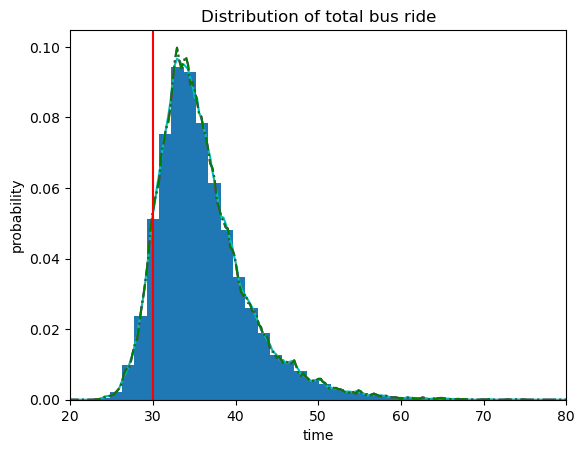

In [10]:
# Create a kernel density for each x_i

#from histogram, looks like the x values are spread over [20,70]
# we will choose a wider interval to ensure we cover all the point
x = np.linspace(0,80,300)

#Gaussian kernel
K = lambda x: 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
fh_g = lambda x,h: 1/(len(Y1)*h)*sum([K((x - Y1[i])/h) for i in range(len(Y))])

u = lambda x: np.heaviside(x + 1,1) - np.heaviside(x - 1,1)

##Triangular kernel
K = lambda x: (1 - np.abs(x))*u(x)
fh_t = lambda x,h: 1/(len(Y1)*h)*sum([K((x - Y1[i])/h) for i in range(len(Y))])

#Rectangular kernel
K = lambda x: 0.5*u(x)
fh_r = lambda x,h: 1/(len(Y1)*h)*sum([K((x - Y1[i])/h) for i in range(len(Y))])

plt.hist(Y1,bins = 40, density = True) 
plt.plot(x,fh_g(x,0.5),color = 'c')
plt.plot(x,fh_t(x,0.3),color = 'm',linestyle = '-.')
plt.plot(x,fh_r(x,0.3),color = 'g',linestyle = '-.')
plt.axvline(x = 30, color = 'r') #cut off for question
plt.title('Distribution of total bus ride')
plt.xlabel('time')
plt.ylabel('probability')
plt.xlim([20,80])
plt.show()

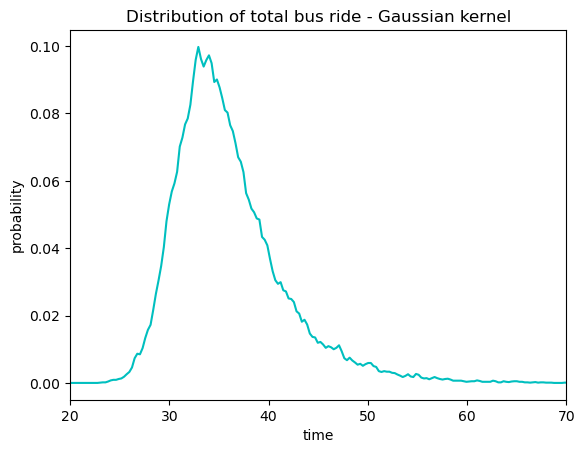

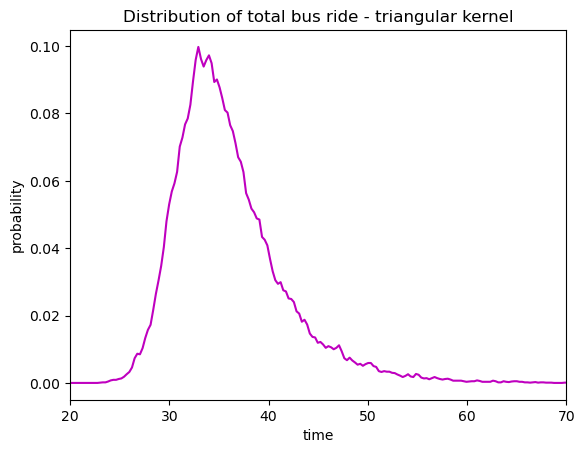

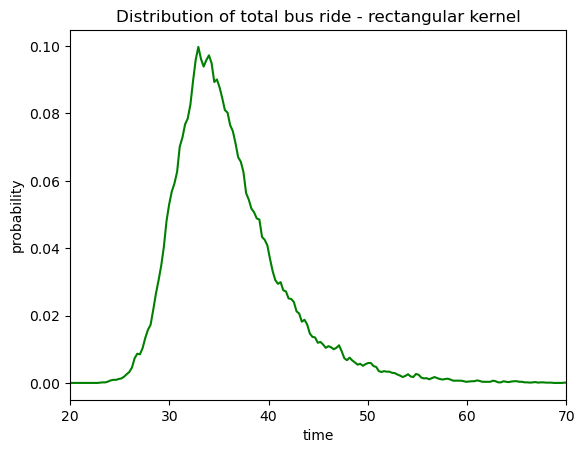

In [11]:
plt.plot(x,fh_g(x,0.3),color = 'c')
plt.title('Distribution of total bus ride - Gaussian kernel')
plt.xlabel('time')
plt.ylabel('probability')
plt.xlim([20,70])
plt.show()

plt.plot(x,fh_t(x,0.3),color = 'm')
plt.title('Distribution of total bus ride - triangular kernel')
plt.xlabel('time')
plt.ylabel('probability')
plt.xlim([20,70])
plt.show()

plt.plot(x,fh_r(x,0.3),color = 'g')
plt.title('Distribution of total bus ride - rectangular kernel')
plt.xlabel('time')
plt.ylabel('probability')
plt.xlim([20,70])
plt.show()

In [12]:
#calculate cumulative probability functions
prob_g = integrate.cumulative_trapezoid(fh_g(x,0.3), x, initial=0)
prob_t = integrate.cumulative_trapezoid(fh_t(x,0.3), x, initial=0)
prob_r = integrate.cumulative_trapezoid(fh_r(x,0.3), x, initial=0)

## we need to find the index number where 30 occurs,
## since we are calculating the cumulative function
index =  np.array(np.where(x < 30))

print((prob_g[index.max()])*100,"%")
print((prob_t[index.max()])*100,"%")
print((prob_r[index.max()])*100,"%")

8.760312151616494 %
8.760312151616494 %
8.760312151616494 %


Notice how these all produce the same shape and probability value.  If we have enough data, then the choice of kernel generally does not matter.

### Kernel Density Estimation Using SciPy

Using the `scipy.stats.gaussian_kde` function, determine the probability density functions for the previous two Transit Travel Time Examples.  Experiment with different bandwidths.  How do the density functions change when the bandwith changes?

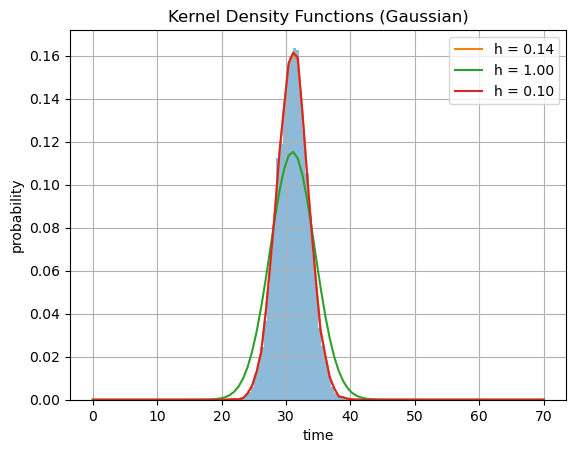

In [13]:
## Transit time 3 example
plt.hist(Y,bins=np.arange(0,70,0.5),density=True,alpha=0.5)
kde1 = stats.gaussian_kde(Y)
kde2 = stats.gaussian_kde(Y,bw_method=1)
kde3 = stats.gaussian_kde(Y,bw_method=0.1)

x = np.linspace(0,70,100)
plt.plot(x,kde1(x),label='h = {:.2f}'.format(kde1.factor))
plt.plot(x,kde2(x),label='h = 1.00')
plt.plot(x,kde3(x),label='h = 0.10')
plt.title('Kernel Density Functions (Gaussian)')
plt.legend()
plt.grid(True)
plt.xlabel('time')
plt.ylabel('probability')
plt.show()

In [14]:
## we can then use integrate_box_1d from the gaussian_kde package to 
## integrate under the produced probability density curve

print(stats.gaussian_kde(Y).integrate_box_1d(0,30)*100,"%")

34.14156371445121 %


Compare this with the value above.  Notice how this is a bit different than us calculating with the cumulative function. One reason for the discrepency is that we are using the index where $30$ occurs to find the probability from the cumulative function.  This is dependent on the discretization for the time values.  We may not have 30 as one of the time point, but rather something below $t=30,$ which is then used as the index.  In otherwords, we may be missing a small sliver under the probability density function due to the coarseness of our discretization.  The `integrate_box_1d` allows us to directly compute the probability up to $30$ minutes. 

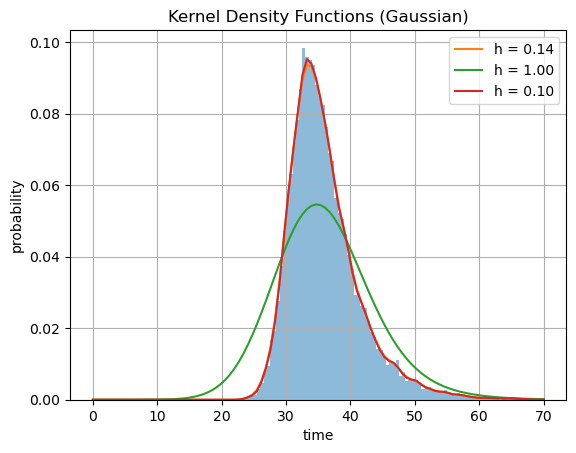

In [15]:
## Transit time 4 example
plt.hist(Y1,bins=np.arange(0,70,0.5),density=True,alpha=0.5)
kde1_1 = stats.gaussian_kde(Y1)
kde2_1 = stats.gaussian_kde(Y1,bw_method=1)
kde3_1 = stats.gaussian_kde(Y1,bw_method=0.1)

x = np.linspace(0,70,100)
plt.plot(x,kde1_1(x),label='h = {:.2f}'.format(kde1_1.factor))
plt.plot(x,kde2_1(x),label='h = 1.00')
plt.plot(x,kde3_1(x),label='h = 0.10')
plt.title('Kernel Density Functions (Gaussian)')
plt.legend()
plt.grid(True)
plt.xlabel('time')
plt.ylabel('probability')
plt.show()

In [16]:
## we can then use integrate_box_1d from the gaussian_kde package to 
## integrate under the produced probability density curve

print(stats.gaussian_kde(Y1).integrate_box_1d(0,30)*100,"%")

9.387879761987165 %


Remark: Notice how the green line has a much broader left and right tail to the probability density function and how the maximum of the green line is much lower than the maximum of the orange line.  This is part of the balance in choosing an $h$ value.  The larger $h$ is, the less information the probability density function will receive from each of the individual data points (as each of the individual kernels becomes more broad -- try playing with the $h$ in the first example to see how $h$ changes the width of the individual kernels. 